<h1><b>Лабораторная работа №5 ч.1 </b></h1>
Анализ ансамблевых методов машинного обучения

1. Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer


In [6]:
# Загружаем датасет
dataset = load_breast_cancer()

# Создаем DataFrame из данных
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Добавляем целевой столбец (метки классов)
data['target'] = dataset.target

# Проверяем первые строки
print(data.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
# Основная информация о данных
print("\nИнформация о данных:")
print(data.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

In [8]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
print(data.isnull().sum())



Пропущенные значения:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [9]:
# Описательная статистика
print("\nОписательная статистика:")
print(data.describe())


Описательная статистика:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000        

2. Визуализация данных

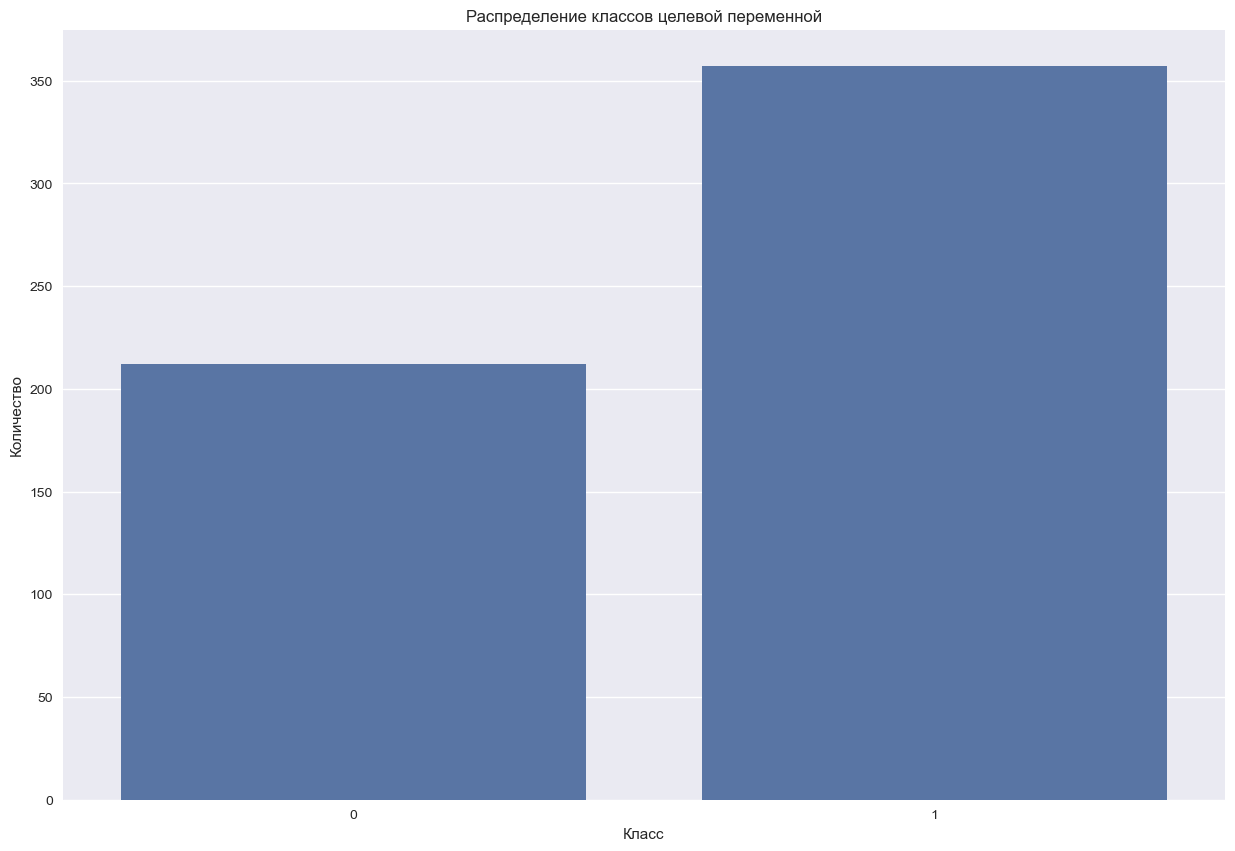

<Figure size 800x550 with 0 Axes>

In [10]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8')  # Или другой доступный стиль из plt.style.available
plt.figure(figsize=(15, 10))

sns.countplot(x='target', data=data)
plt.title('Распределение классов целевой переменной')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

plt.tight_layout()
plt.show()

3. Подготовка данных для моделирования

Выбор признаков и целевых переменных

In [11]:
features = data.drop('target', axis=1)

# Целевая переменная
target = data['target']

# Масштабирование признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.3, random_state=42
)

4. Обучение моделей для прогнозирования диареи

In [15]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

results_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_list.append({
        'Model': name,
        'Accuracy': acc,
        'F1-score': f1
    })

# Создание DataFrame из списка словарей
results_cancer = pd.DataFrame(results_list)

print("Результаты для случаев диареи:")
print(results_cancer.sort_values('F1-score', ascending=False))

c:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Результаты для случаев диареи:
               Model  Accuracy  F1-score
2           AdaBoost  0.982456  0.986047
4        Extra Trees  0.976608  0.981651
0      Random Forest  0.970760  0.977169
1  Gradient Boosting  0.959064  0.967742
3            Bagging  0.959064  0.967742


8. Визуализация результатов

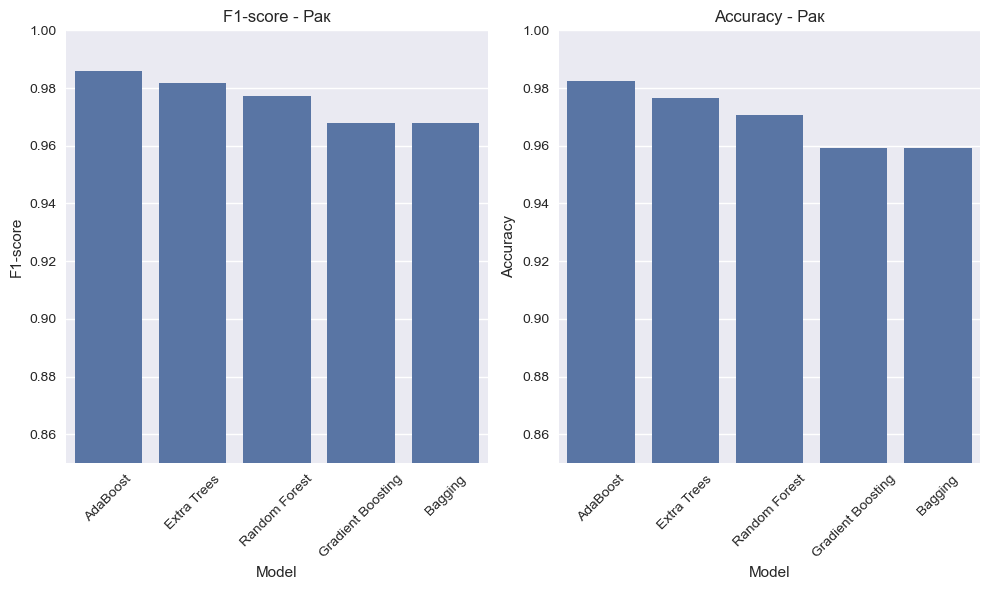

In [20]:
# Функция для визуализации результатов
def plot_results(results, title):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='F1-score', data=results.sort_values('F1-score', ascending=False))
    plt.ylim(0.85, 1.0)
    plt.title(f'F1-score - {title}')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='Accuracy', data=results.sort_values('Accuracy', ascending=False))
    plt.ylim(0.85, 1.0)
    plt.title(f'Accuracy - {title}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_results(results_cancer, 'Рак')


9. Анализ важности признаков

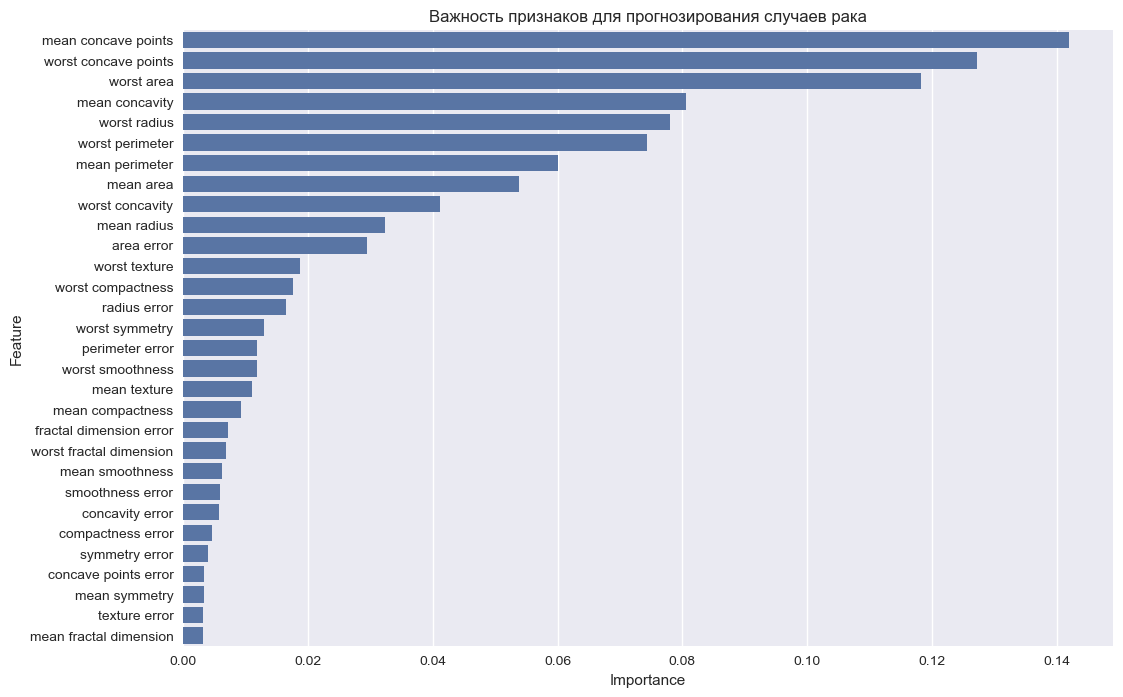

In [22]:
# Анализ важности признаков для лучшей модели (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

importances = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков для прогнозирования случаев рака')
plt.show()